In [4]:
import cv2
import numpy as np
import os
import time
from matplotlib import pyplot as plt

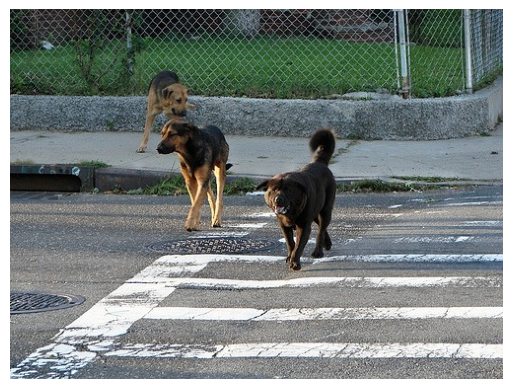

In [27]:
# Path to the image
img_name = r'..\dog1.jpg'  # Use an absolute path

# Check if the file exists
if not os.path.exists(img_name):
    print("Error: The file does not exist.")
else:
    # Reading the image
    img = cv2.imread(img_name)

    # Check if the image was successfully loaded
    if img is None:
        print("Error: Could not read the image.")
    else:
        # Display the image
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Optional: hides the axis
        plt.show()


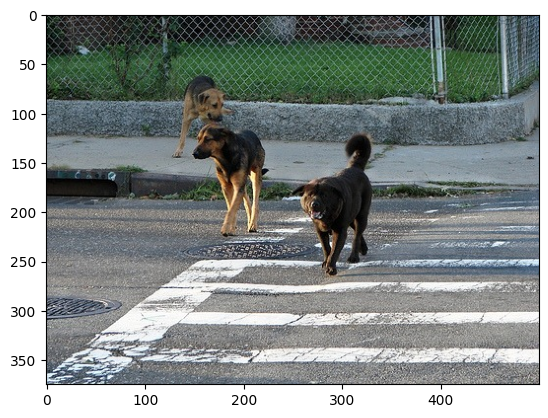

In [28]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [30]:
# Load class names and set random colors
classes = open('..\coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

In [33]:
# Load YOLO model and Setting Backend and Target
#net = cv2.dnn.readNetFromDarknet('..\yolov3.weights')
#net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
import cv2

# Load YOLO model
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

# Set preferable backend and target
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'cv::dnn::dnn4_v20240521::readNetFromDarknet'


In [ ]:
# Get output layer names
ln = net.getLayerNames()
len(ln)

In [ ]:
print(ln)

In [ ]:
# Construct a blob from the image :::: is used to prepare an image for input into a deep learning model. Also ensures compatible with the YOLO model,
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

In [ ]:
# Set input to prepared image blob as the input for the YOLO network
net.setInput(blob)

In [ ]:
# Perform forward pass
t0 = time.time()
outputs = net.forward(ln)
t = time.time()
print('It took %.3f seconds to process the image.' % (t - t0))

In [ ]:
# Construct a blob from the image
blob = cv2.dnn.blobFromImage(img, 1/255.0, (412, 412), swapRB=True, crop=False)
r = blob[0, 0, :, :]
plt.imshow(r)
print('Blob shape=%s' % (blob.shape,))

In [5]:
boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]

# Iterate over each of the layer outputs
for output in outputs:
    for detection in output:
        scores = detection[5:]
        if len(scores) == 0:
            continue  # Skip if no scores are present
        classID = np.argmax(scores)
        if classID >= len(scores):
            print(f"Warning: classID {classID} is out of bounds for scores array with size {len(scores)}")
            continue
        confidence = scores[classID]
        if not np.isscalar(confidence):
            print(f"Warning: Confidence is not a scalar value, it's a {type(confidence)}")
            continue
        if confidence > 0.5:  # Confidence threshold
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            box = [x, y, int(width), int(height)]
            boxes.append(box)
            confidences.append(float(confidence))
            classIDs.append(classID)

# Apply Non-Maximum Suppression to suppress weak, overlapping bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Ensure at least one detection
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        # Draw the bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 4)
        # Draw the label and confidence
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Display the image
print('Image preview:')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

SyntaxError: invalid character '↪' (U+21AA) (3770885478.py, line 2)